In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\prish\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [5]:
import yfinance as yf
start = '2010-01-01'
end = '2023-12-31'

df = yf.download('TSLA',start,end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [6]:
# removing dates
df = df.reset_index()

In [8]:
df=df.drop(['Date','Adj Close'],axis = 1)

In [9]:
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


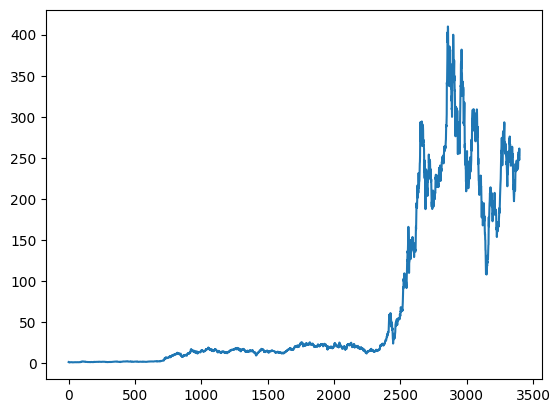

In [11]:
plt.plot(df.Close)

In [14]:
ma100 = df.Close.rolling(100).mean() #moving average of 100
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3395    241.505100
3396    241.477999
3397    241.553799
3398    241.571099
3399    241.558899
Name: Close, Length: 3400, dtype: float64

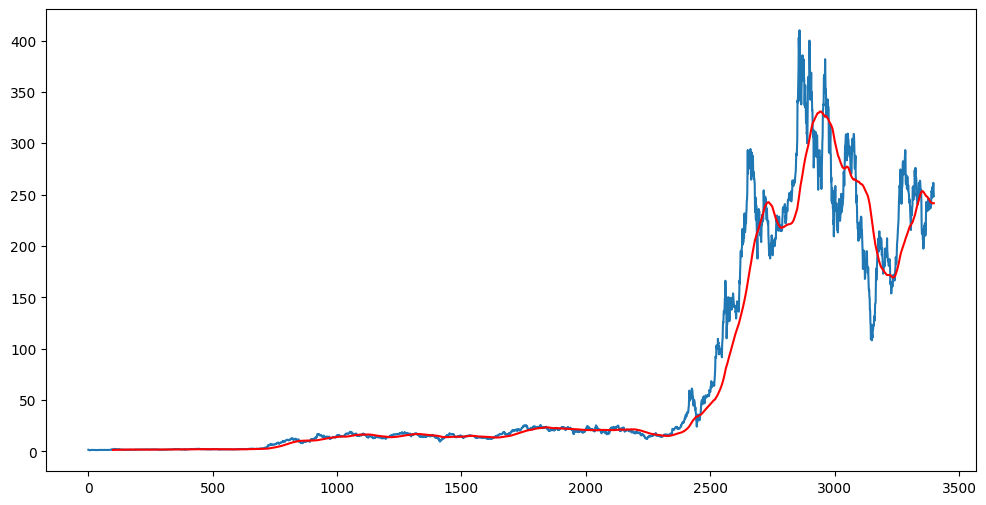

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [16]:
ma200 = df.Close.rolling(200).mean() #moving average of 100
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3395    227.70775
3396    228.12360
3397    228.55840
3398    228.90800
3399    229.24815
Name: Close, Length: 3400, dtype: float64

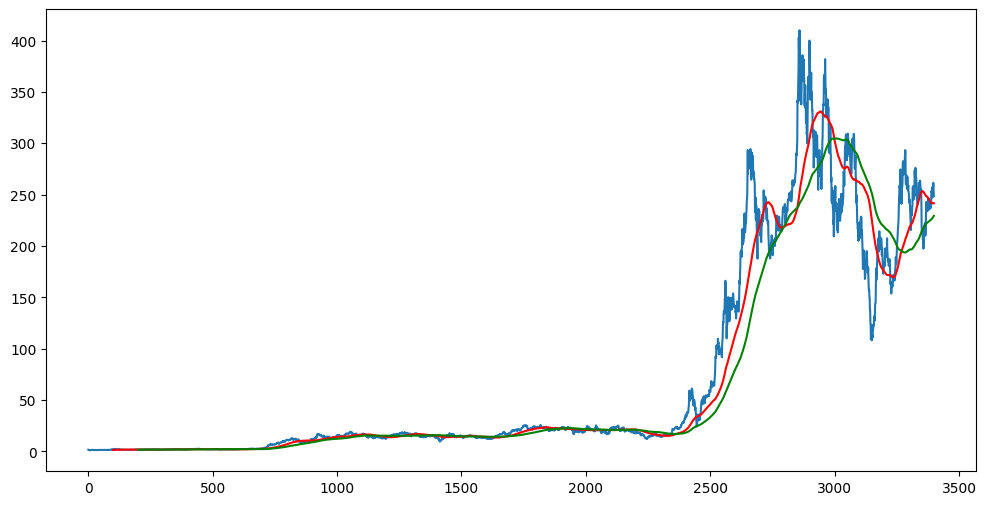

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [20]:
# splitting

data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])


print(data_train.shape)
print(data_test.shape)

(2380, 1)
(1020, 1)


In [22]:
data_train.head()

,Close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000


In [23]:
# scaling down the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))

In [26]:
data_training_array = scaler.fit_transform(data_train)
data_training_array

array([[0.02191227],
       [0.02174975],
       [0.01668473],
       ...,
       [0.86698267],
       [0.87684173],
       [0.90205848]])

In [28]:
x_train = []
y_train = []

for i in range (100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train = np.array(x_train),np.array(y_train) 

# ML MODEL

In [29]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [36]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

model = Sequential()

# First LSTM layer
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

# Fourth LSTM layer (final one, no return_sequences here)
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1))




In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_2 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_3 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_4 (LSTM)               (None, 120)              

In [41]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
72/72 [==============================] - 84s 806ms/step - loss: 0.0396
Epoch 2/50
72/72 [==============================] - 56s 784ms/step - loss: 0.0109
Epoch 3/50
72/72 [==============================] - 57s 793ms/step - loss: 0.0096
Epoch 4/50
72/72 [==============================] - 56s 772ms/step - loss: 0.0094
Epoch 5/50
72/72 [==============================] - 57s 788ms/step - loss: 0.0105
Epoch 6/50
72/72 [==============================] - 57s 789ms/step - loss: 0.0085
Epoch 7/50
72/72 [==============================] - 58s 805ms/step - loss: 0.0086
Epoch 8/50
72/72 [==============================] - 57s 796ms/step - loss: 0.0068
Epoch 9/50
72/72 [==============================] - 55s 764ms/step - loss: 0.0071
Epoch 10/50
72/72 [==============================] - 56s 777ms/step - loss: 0.0070
Epoch 11/50
72/72 [==============================] - 31s 429ms/step - loss: 0.0064
Epoch 12/50
72/72 [==============================] - 34s 473ms/step - loss: 0.0065
Epoch 13/50
7

In [46]:
model.save('kera_model.h5')

C:\Users\prish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
data_test.head()

,Close
2380,23.513332
2381,23.978666
2382,23.892668
2383,25.433332
2384,25.266001


In [49]:
past_100_days = data_train.tail(100)

In [55]:
final_df = pd.concat([past_100_days, data_test], ignore_index=True)


In [56]:
final_df.head()

,Close
0,17.045334
1,17.344667
2,17.658667
3,15.254667
4,15.202667


In [57]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(1120, 1)

In [58]:
x_test = []
y_test =[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [59]:
x_test , y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1020, 100, 1)
(1020,)


In [60]:
# making the predictions

y_predicted = model.predict(x_test)
y_predicted.shape



32/32 [==============================] - 2s 59ms/step


(1020, 1)

In [61]:
scaler.scale_ # gives factor by whcih we have scaled down


scale_factor = 1/ 0.02099517
y_predicted = y_predicted*scale_factor
y_test = y_test * scale_factor

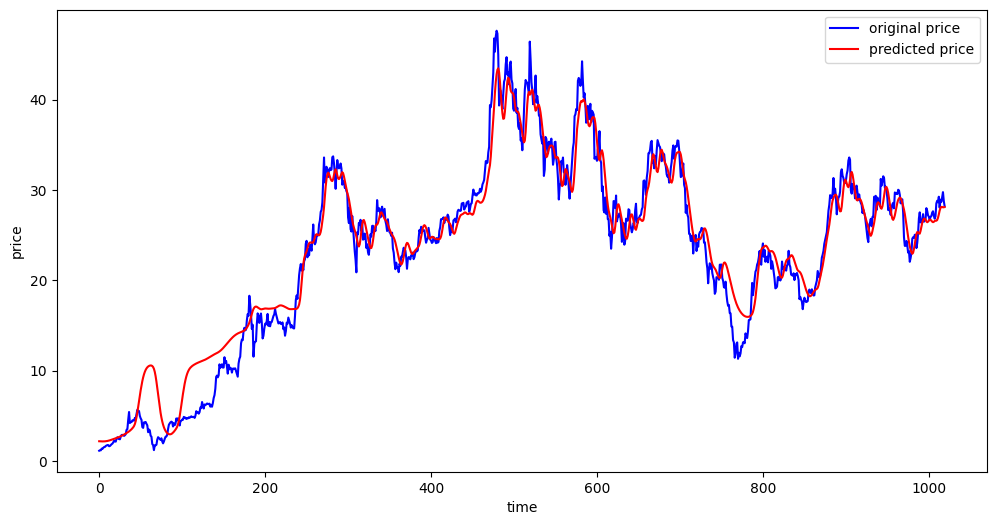

In [62]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'original price')
plt.plot(y_predicted,'r',label='predicted price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()